In [1]:
import os
from datetime import datetime

import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 1000
matplotlib.rcParams['lines.linewidth'] = 1.0

# Preparing data

In [3]:
original_keywords = ["Picard", "Kirk", "Sulu", "Uhura", "Spock", "McCoy", "Bones", "Scotty", "Chekhov", "Crusher", "Nurse Chapel", "Sarek", "Nero", "Khan", "Data", "Pike", "Star Trek", "Klingon", "Vulcan", "Romulan", "Star fleet", "Starship Enterprise", "Delta Vega", "Earth", "Orion", "Romulan Narada", "Stardate", "Transporter beam", "Beam me up,\? Scotty", "Kobayashi Maru", "Space,\? The Final Frontier", "Energize", "Vulcan Salute", "Prime Directive", "Live long and prosper", "LLAP", "I'm a doctor,\? not a", "KHAAA\+N", "When you eliminate the impossible,\? whatever remains,\? however improbable,\? must be the truth", "Without followers,\? evil cannot spread", "The needs of the many outweigh the needs of the few", "Highly illogical", "to boldly go where no man has gone before", "I'm giving her all she's got,\? Captain", "Nuclear wessels", "Set phasers to stun", "Resistance is futile", "I have been and always shall be your friend"]

In [4]:
print(original_keywords)

['Picard', 'Kirk', 'Sulu', 'Uhura', 'Spock', 'McCoy', 'Bones', 'Scotty', 'Chekhov', 'Crusher', 'Nurse Chapel', 'Sarek', 'Nero', 'Khan', 'Data', 'Pike', 'Star Trek', 'Klingon', 'Vulcan', 'Romulan', 'Star fleet', 'Starship Enterprise', 'Delta Vega', 'Earth', 'Orion', 'Romulan Narada', 'Stardate', 'Transporter beam', 'Beam me up,\\? Scotty', 'Kobayashi Maru', 'Space,\\? The Final Frontier', 'Energize', 'Vulcan Salute', 'Prime Directive', 'Live long and prosper', 'LLAP', "I'm a doctor,\\? not a", 'KHAAA\\+N', 'When you eliminate the impossible,\\? whatever remains,\\? however improbable,\\? must be the truth', 'Without followers,\\? evil cannot spread', 'The needs of the many outweigh the needs of the few', 'Highly illogical', 'to boldly go where no man has gone before', "I'm giving her all she's got,\\? Captain", 'Nuclear wessels', 'Set phasers to stun', 'Resistance is futile', 'I have been and always shall be your friend']


In [5]:
ambiguous_keywords = [
    'Bones',
    'Khan',
    'Data',
    'Earth',
    'Energize',
]

In [6]:
keywords = list(set(original_keywords).difference(ambiguous_keywords))
keywords.sort()

In [7]:
print(keywords)

['Beam me up,\\? Scotty', 'Chekhov', 'Crusher', 'Delta Vega', 'Highly illogical', 'I have been and always shall be your friend', "I'm a doctor,\\? not a", "I'm giving her all she's got,\\? Captain", 'KHAAA\\+N', 'Kirk', 'Klingon', 'Kobayashi Maru', 'LLAP', 'Live long and prosper', 'McCoy', 'Nero', 'Nuclear wessels', 'Nurse Chapel', 'Orion', 'Picard', 'Pike', 'Prime Directive', 'Resistance is futile', 'Romulan', 'Romulan Narada', 'Sarek', 'Scotty', 'Set phasers to stun', 'Space,\\? The Final Frontier', 'Spock', 'Star Trek', 'Star fleet', 'Stardate', 'Starship Enterprise', 'Sulu', 'The needs of the many outweigh the needs of the few', 'Transporter beam', 'Uhura', 'Vulcan', 'Vulcan Salute', 'When you eliminate the impossible,\\? whatever remains,\\? however improbable,\\? must be the truth', 'Without followers,\\? evil cannot spread', 'to boldly go where no man has gone before']


In [8]:
# %%time

# DATA_FOLDER = 'data/'

# ls = []
# for filename in sorted(os.listdir(DATA_FOLDER)):
#         with open(DATA_FOLDER + filename) as f:
#             print(DATA_FOLDER + filename, sep=' ', end=' ', flush=True)
#             lines = f.readlines()
#             lines = map(lambda x: x.strip(), lines)
#             js = '[' + ','.join(lines) + ']'
#             df = pd.read_json(js)
#             ls.append(df)
# reddit_df = pd.concat(ls, ignore_index=True)

# CPU times: user 1min 7s, sys: 4.66 s, total: 1min 11s
# Wall time: 1min 14s

In [9]:
# len(reddit_df)

# 2669814

In [10]:
# %%time

# reddit_df['body'] = reddit_df.apply(lambda x: x['body'].replace('\n', ' - ').replace('\r', ' - '), axis=1)

# CPU times: user 1min 35s, sys: 890 ms, total: 1min 36s
# Wall time: 1min 36s

In [11]:
# %%time

# def convert_datetime(x):
#     return pd.to_datetime(datetime.fromtimestamp(int(x['created_utc'])))

# reddit_df['created_utc'] = reddit_df.apply(convert_datetime, axis=1)

# CPU times: user 6min 27s, sys: 6.59 s, total: 6min 34s
# Wall time: 6min 34s

In [12]:
# %%time

# def month_year(x):
#     return pd.tslib.Timestamp(day=1, month=x['created_utc'].month, year=x['created_utc'].year)

# reddit_df['month'] = reddit_df.apply(month_year, axis=1)

# CPU times: user 7min 49s, sys: 1.36 s, total: 7min 51s
# Wall time: 7min 59s

In [13]:
# %%time

# def only_year(x):
#     return pd.tslib.Timestamp(day=1, month=1, year=x['created_utc'].year)

# reddit_df['year'] = reddit_df.apply(only_year, axis=1)

# CPU times: user 6min 21s, sys: 1.29 s, total: 6min 22s
# Wall time: 6min 22s

In [14]:
# %%time

# reddit_df.to_csv('reddit.csv', index=False)

# CPU times: user 1min 35s, sys: 2.02 s, total: 1min 37s
# Wall time: 1min 39s

In [15]:
%%time

dtypes = {
    'author': str,
    'body': str,
    'controversiality': str,
    'created_utc': pd.tslib.Timestamp,
    'distinguished': str,
    'downs': str,
    'gilded': str,
    'id': str,
    'name': str,
    'parent_id': str,
    'score': str,
    'subreddit': str,
    'ups': str,
    'month': pd.tslib.Timestamp,
    'year': pd.tslib.Timestamp,
}

reddit_df = pd.read_csv('reddit.csv', header=0, dtype=dtypes, parse_dates=['created_utc', 'month', 'year'])
reddit_df = reddit_df.fillna('')

CPU times: user 29.8 s, sys: 1.48 s, total: 31.3 s
Wall time: 31.2 s


In [16]:
len(reddit_df)

2669814

In [17]:
reddit_df.head()

,author,body,controversiality,created_utc,distinguished,downs,gilded,id,name,parent_id,score,subreddit,ups,month,year
0,gschizas,Same in Greek. My personal peeve: quite a lot ...,0,2007-10-15 15:22:33,,0.0,0,c029c79,t1_c029c79,t1_c029brz,13,programming,13,2007-10-01,2007-01-01
1,[deleted],&gt;They also decided to rig a thermal barrier...,0,2007-10-16 05:11:09,,0.0,0,c029g6h,t1_c029g6h,t3_5ye94,2,programming,2,2007-10-01,2007-01-01
2,johnmudd,&gt; By the time a child born today graduates ...,0,2007-10-16 07:00:36,,0.0,0,c029gfc,t1_c029gfc,t3_5ye9w,1,science,1,2007-10-01,2007-01-01
3,feliniti,nero 8 - bloated waste of money. Unless you ha...,0,2007-10-16 07:10:27,,0.0,0,c029gge,t1_c029gge,t3_5yej4,1,reddit.com,1,2007-10-01,2007-01-01
4,masklinn,&gt; I wonder what happens if you started clea...,0,2007-10-16 11:27:15,,0.0,0,c029hiy,t1_c029hiy,t1_c029h3y,3,reddit.com,3,2007-10-01,2007-01-01


# Analyzing data

In [18]:
valid_dates = pd.date_range('2007-10-1', '2016-08-31', freq='MS')

In [19]:
peaks1 = ['2007-10-01', '2009-05-01', '2010-01-01', '2011-01-01', '2012-09-01', '2013-01-01', '2013-05-01', '2013-12-01',
         '2014-10-01', '2015-03-01', '2015-10-01', '2015-12-01', '2016-07-01',]
peaks1 = list(map(pd.lib.Timestamp, peaks1))

In [20]:
show_dates1 = [x.strftime('%Y %b') if x in peaks1 else '' for x in valid_dates]

In [21]:
reddit_by_month = reddit_df.groupby('month')['id'].count()

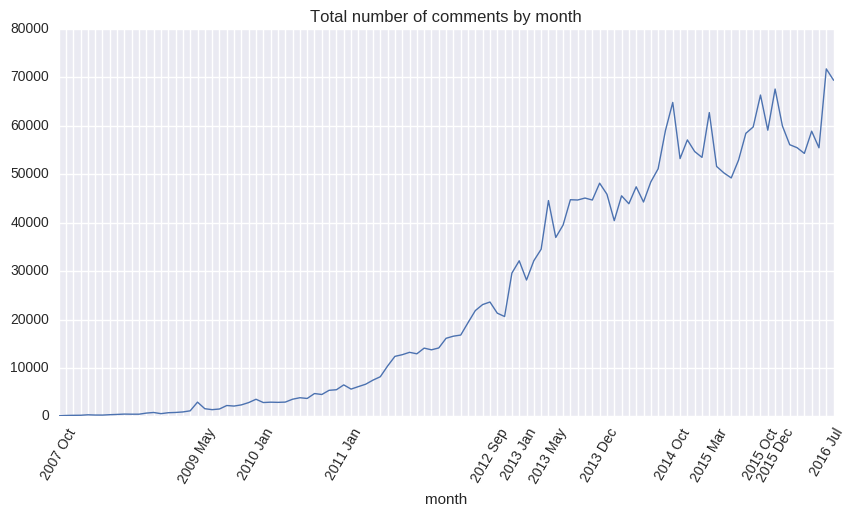

In [22]:
ax = reddit_by_month.plot(
    figsize=(10,5),
    xlim=('2007-10-01', '2016-08-31'),
    xticks=reddit_by_month.index,
    rot=60,
    title='Total number of comments by month',
)
ax.set_xticklabels(show_dates1);

In [23]:
total_lines = {}

with open('total_lines.txt') as f:
    for line in f:
        if not line.startswith('wc'):
            total, path = line.strip().split()
            month = path.split('/')[-1][3:] + '-01'
            total_lines[pd.lib.Timestamp(month)] = int(total)

In [24]:
total_lines_sr = pd.Series(total_lines)

In [25]:
comparison_df = pd.DataFrame({'Star Trek': reddit_by_month.values, 'Total Reddit': total_lines_sr})

In [26]:
comparison_df['Proportion (%)'] = comparison_df.apply(lambda x: 100 * x['Star Trek'] / x['Total Reddit'], axis=1)

In [27]:
comparison_df.head()

,Star Trek,Total Reddit,Proportion (%)
2007-10-01,119,150429,0.079107
2007-11-01,190,372983,0.050941
2007-12-01,222,363390,0.061091
2008-01-01,235,452990,0.051878
2008-02-01,328,441768,0.074247


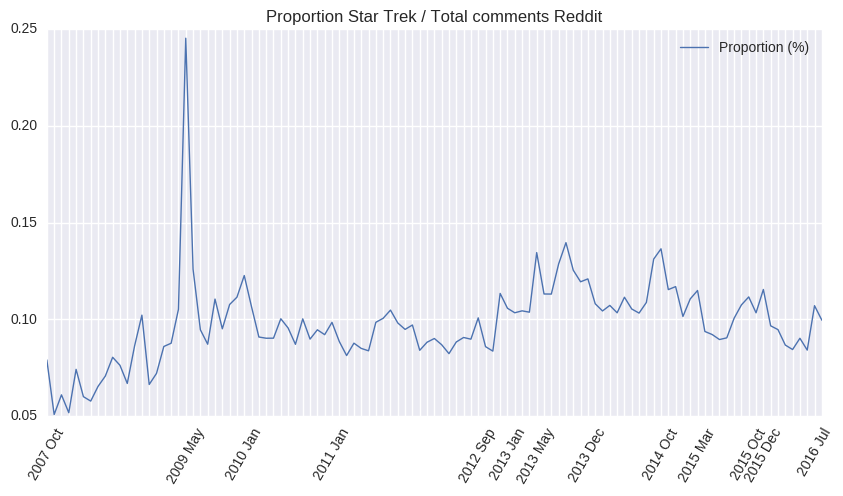

In [28]:
ax = comparison_df[['Proportion (%)']].plot(
    figsize=(10,5),
    xlim=('2007-10-01', '2016-08-31'),
    xticks=comparison_df.index,
    rot=60,
    title='Proportion Star Trek / Total comments Reddit',)
ax.set_xticklabels(show_dates1);

In [29]:
vulcan_salute_df = reddit_df[reddit_df['body'].str.contains('Vulcan Salute', case=False)]

In [30]:
len(vulcan_salute_df)

1612

In [31]:
# peaks2 = ['2007-10-01', '2009-11-01', '2015-02-01', '2016-08-01',]
# peaks2 = list(map(pd.lib.Timestamp, peaks2))

In [32]:
# show_dates2 = [x.strftime('%Y %b') if x in peaks2 else '' for x in valid_dates]

In [33]:
vulcan_salute_by_month = vulcan_salute_df.groupby('month')['id'].count()

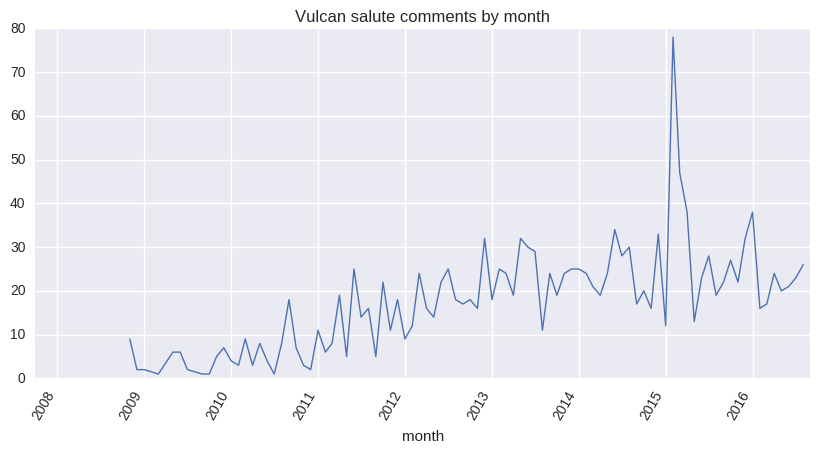

In [34]:
ax = vulcan_salute_by_month.plot(
    figsize=(10,5),
    xlim=('2007-10-01', '2016-08-31'),
#     xticks=vulcan_salute_by_month.index,
    rot=60,
    title='Vulcan salute comments by month',
)
# ax.set_xticklabels(show_dates2);

In [35]:
khaaan_df = reddit_df[reddit_df['body'].str.contains('Khaaa+n', case=False)]

In [36]:
len(khaaan_df)

6851

In [37]:
peaks3 = ['2009-01-01', '2011-03-01', '2011-12-01', '2013-05-01', '2013-10-01', '2016-07-01',]
peaks3 = list(map(pd.lib.Timestamp, peaks3))

In [38]:
show_dates3 = [x.strftime('%Y %b') if x in peaks3 else '' for x in valid_dates]

In [39]:
khaaan_df_by_month = khaaan_df.groupby('month')['id'].count()

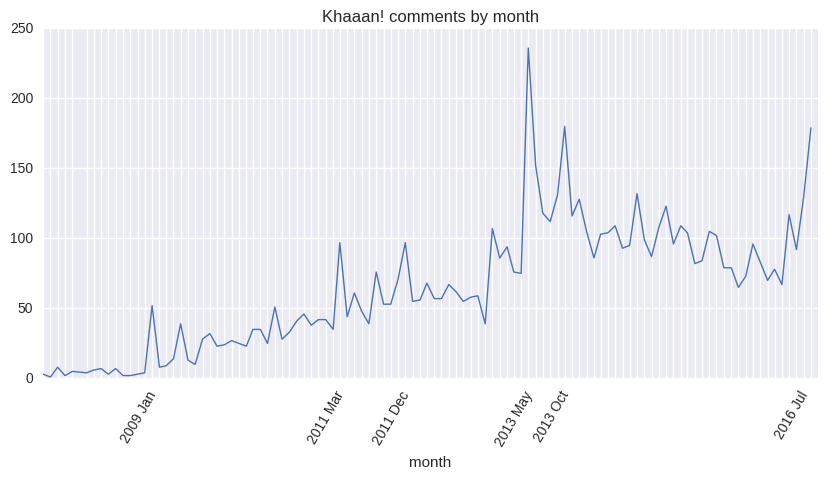

In [40]:
ax = khaaan_df_by_month.plot(
    figsize=(10,5),
    xlim=('2007-10-01', '2016-08-31'),
    xticks=khaaan_df_by_month.index,
    rot=60,
    title='Khaaan! comments by month',
)
ax.set_xticklabels(show_dates3);